<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/DLI_GroupAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT CSV FILES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/dataset_phishing.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
X = df.drop('Label', axis=1).values
y = df['Label'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (9144, 87)
Testing shape: (2286, 87)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7781 - loss: 0.4608 - val_accuracy: 0.9475 - val_loss: 0.1458
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9347 - loss: 0.1815 - val_accuracy: 0.9558 - val_loss: 0.1210
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9411 - loss: 0.1614 - val_accuracy: 0.9584 - val_loss: 0.1133
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9441 - loss: 0.1586 - val_accuracy: 0.9598 - val_loss: 0.1065
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9495 - loss: 0.1354 - val_accuracy: 0.9615 - val_loss: 0.1049
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1238 - val_accuracy: 0.9641 - val_loss: 0.1043
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1246 - val_accuracy: 0.9593 - val_loss: 0.1070
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9616 - loss: 0.1142 - val_accuracy: 0.9611 - val_

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.0935
Test Accuracy: 96.50%


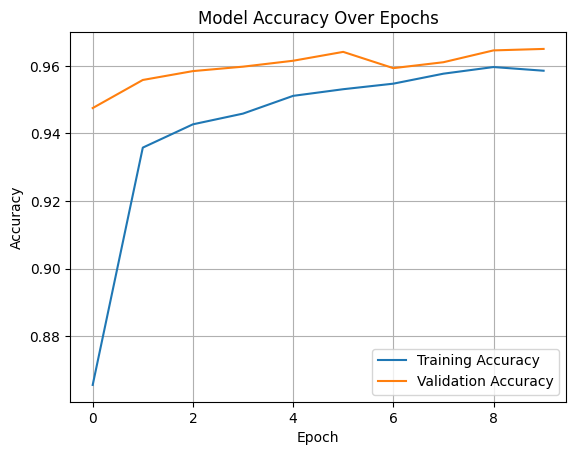

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
